In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D

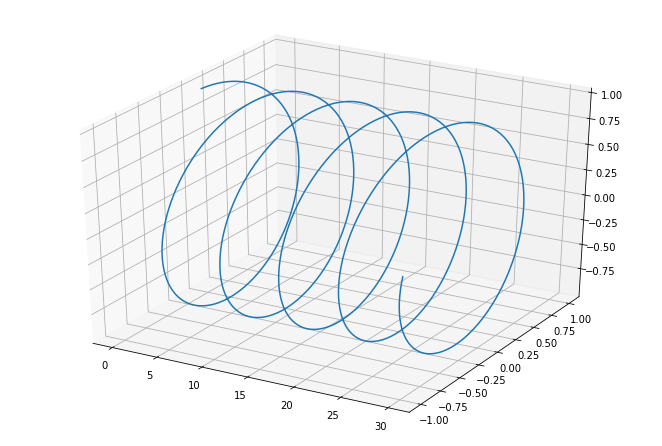

In [4]:
fig = plt.figure(figsize=(9,6))
ax3d = Axes3D(fig)
x = np.linspace(0,30,500)
y = np.sin(x)
z = np.cos(x)
ax3d.plot(x,y,z)

Text(0.5, 0, 'Z')

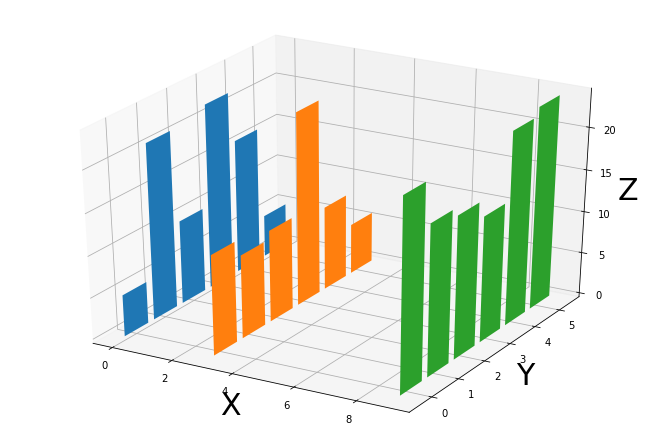

In [12]:
fig = plt.figure(figsize=(9,6))
ax3d = Axes3D(fig)
for i in [0,3,9]:
    ax3d.bar(np.arange(6),np.random.randint(5,30,size = 6),zs = i,zdir = 'x')
ax3d.set_xlabel('X',size = 30)
ax3d.set_ylabel('Y',size = 30)
ax3d.set_zlabel('Z',size = 30)

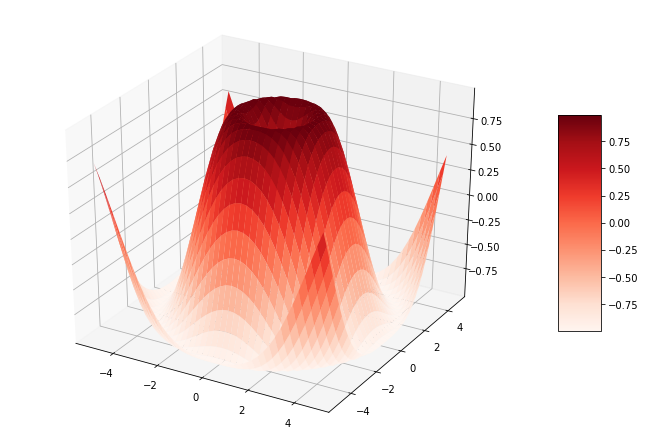

In [38]:
# 绘制的面
fig = plt.figure(figsize=(9,6))
ax3d = Axes3D(fig)

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

surf = ax3d.plot_surface(X,Y,Z,cmap = plt.cm.Reds)
fig.colorbar(surf, shrink=0.5, aspect=5)

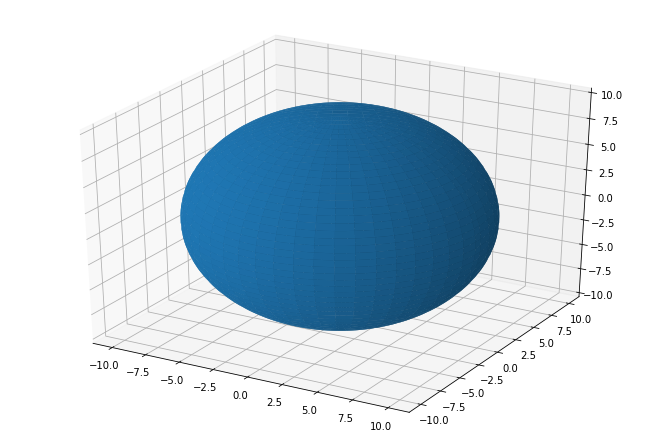

In [39]:
fig = plt.figure(figsize=(9,6))
ax3d = Axes3D(fig)
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))
ax3d.plot_surface(x,y,z)

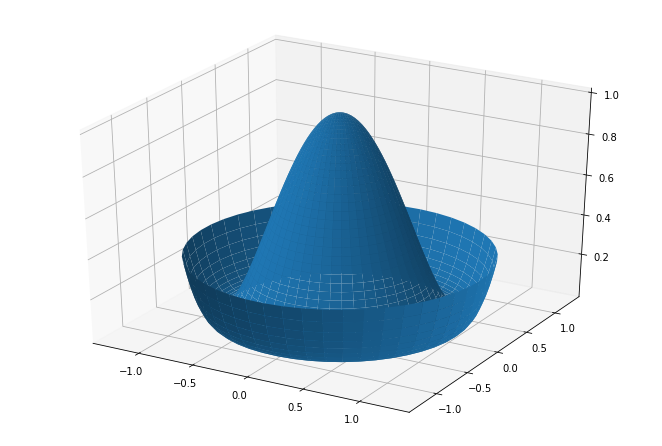

In [40]:
fig = plt.figure(figsize=(9,6))
ax3d = Axes3D(fig)
r = np.linspace(0, 1.25, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)#网格交叉
Z = ((R**2 - 1)**2)
# Express the mesh in the cartesian system.
X, Y = R*np.cos(P), R*np.sin(P)
ax3d.plot_surface(X,Y,Z)

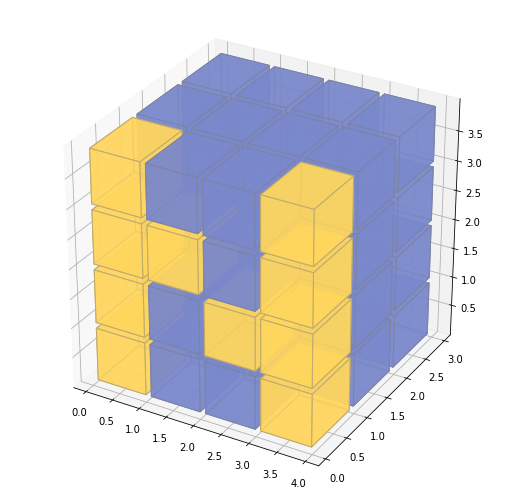

In [45]:
plt.figure(figsize=(9,9))
ax3d = plt.subplot(111,projection = '3d')

def explode(data):
    size = np.array(data.shape)*2
    data_e = np.zeros(size - 1, dtype=data.dtype)
    data_e[::2, ::2, ::2] = data
    return data_e

# build up the numpy logo
n_voxels = np.zeros((4, 3, 4), dtype=bool)
n_voxels[0, 0, :] = True
n_voxels[-1, 0, :] = True
n_voxels[1, 0, 2] = True
n_voxels[2, 0, 1] = True
facecolors = np.where(n_voxels, '#FFD65DC0', '#7A88CCC0')
edgecolors = np.where(n_voxels, '#BFAB6E', '#7D84A6')
filled = np.ones(n_voxels.shape)

# upscale the above voxel image, leaving gaps
filled_2 = explode(filled)
fcolors_2 = explode(facecolors)
ecolors_2 = explode(edgecolors)

# Shrink the gaps
x, y, z = np.indices(np.array(filled_2.shape) + 1).astype(float) // 2
x[0::2, :, :] += 0.05
y[:, 0::2, :] += 0.05
z[:, :, 0::2] += 0.05
x[1::2, :, :] += 0.95
y[:, 1::2, :] += 0.95
z[:, :, 1::2] += 0.95

_ = ax3d.voxels(x,y,z,filled =filled_2,facecolors = fcolors_2,edgecolors = ecolors_2 )